# 1. 구글 드라이브 연결하기




*   지원자의 구글 드라이브와 본 .ipynb 파일을 연동합니다.
*   연동이 되지 않으면 첨부해드린 데이터 조회가 불가합니다.
*   성공적으로 연동이 되면 "Mounted at /content/drive" 라는 메세지를 호출 받습니다.
*   Local 환경에서 수행하는 경우 구글 드라이브와 연결하실 필요 없습니다(아래 코드 실행하지 말아주세요).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. 환경 설정


*   분석에 필요한 라이브러리를 import 해주세요.
* 사용가능한 라이브러리는 os, sys, numpy, pandas, matplotlib, seaborn, scipy, sckit-learn, statsmodel, eli5, json 으로 제한합니다.



In [2]:
# 필요 라이브러리 load

import pandas as pd
import numpy as np
import seaborn as sns
import json

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm

from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

*   첨부해드린 .csv 파일이 있는 경로를 지정해주셔야 데이터 load가 가능합니다.
*   왼쪽 "파일" 탭에서 ".csv" 파일의 경로를 복사/붙여넣기 하여 경로를 설정해 주세요




In [3]:
# 파일 불러오기

train_2_1 = pd.read_csv('/content/drive/MyDrive/problem_data/train_2_1.csv')
train_2_2 = pd.read_csv('/content/drive/MyDrive/problem_data/train_2_2.csv')
test = pd.read_csv('/content/drive/MyDrive/problem_data/test_2.csv')

# 3. 답안 작성
*   문제에 따라 답안을 작성해 주세요. (코드 결과 재현을 위한 Seed 값 지정 필수)


###### 문제 2.1. train_2_1.csv 데이터와 train_2_2.csv 데이터를 불러온 뒤 join하여 학습용 데이터 셋을 구축하세요. 

---

In [4]:
#데이터 확인
train_2_1.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,f3f9002e121cbbcc038f195a656a32a17395c6ce1815e8...,s,c,N,Y,V,t,s,r,E,g,m,x,u,g,Z,Z
1,5f362546eb7515f442a40d3d9bf632e4a481c92bcb0529...,s,c,N,T,a,t,M,T,E,P,w,H,Z,R,Z,r
2,ac2cf334bdc5a53a7a18f5c7e951a6c84c1f60c7bb19f7...,s,B,p,Y,A,G,s,T,i,g,n,x,Z,R,Z,Z
3,996bda4a4360449adb8be18fbd2980fde23c158f8dedf4...,s,c,N,Y,a,t,M,T,i,g,w,x,Z,g,Z,r
4,1548ef706daa276fa70cdd2fe6006489343daf906c3f6e...,P,t,y,R,A,z,L,T,E,a,w,H,Z,R,V,h


In [5]:
#결측치가 존재하지 않는 행만 결합하라했으므로 결측값 여부를 확인함

train_2_1.isnull().sum()

ID     1
V1     1
V2     1
V3     1
V4     0
V5     0
V6     1
V7     1
V8     0
V9     1
V10    0
V11    1
V12    2
V13    1
V14    0
V15    1
V16    1
dtype: int64

In [6]:
#데이터 확인2
train_2_2.head()

,ID,V17,V18,V19,V20,Label
0,f3f9002e121cbbcc038f195a656a32a17395c6ce1815e8...,38.01,1,39.75,1,P
1,5f362546eb7515f442a40d3d9bf632e4a481c92bcb0529...,1897.66,34,66.85,0,P
2,ac2cf334bdc5a53a7a18f5c7e951a6c84c1f60c7bb19f7...,1957.56,22,99.00,1,P
3,996bda4a4360449adb8be18fbd2980fde23c158f8dedf4...,595.61,13,59.85,0,P
4,1548ef706daa276fa70cdd2fe6006489343daf906c3f6e...,334.96,16,28.85,1,P


In [7]:
#결측치가 존재하지 않는 행만 결합하라했으므로 결측값 여부를 확인함
train_2_2.isnull().sum()

ID       1
V17      0
V18      0
V19      2
V20      0
Label    0
dtype: int64

In [8]:
#ID 컬럼을 기준으로 inner join을 수행

train_merge = pd.merge(train_2_1,train_2_2,how='inner',on='ID')

train_merge.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Label
0,f3f9002e121cbbcc038f195a656a32a17395c6ce1815e8...,s,c,N,Y,V,t,s,r,E,...,x,u,g,Z,Z,38.01,1,39.75,1,P
1,5f362546eb7515f442a40d3d9bf632e4a481c92bcb0529...,s,c,N,T,a,t,M,T,E,...,H,Z,R,Z,r,1897.66,34,66.85,0,P
2,ac2cf334bdc5a53a7a18f5c7e951a6c84c1f60c7bb19f7...,s,B,p,Y,A,G,s,T,i,...,x,Z,R,Z,Z,1957.56,22,99.00,1,P
3,996bda4a4360449adb8be18fbd2980fde23c158f8dedf4...,s,c,N,Y,a,t,M,T,i,...,x,Z,g,Z,r,595.61,13,59.85,0,P
4,1548ef706daa276fa70cdd2fe6006489343daf906c3f6e...,P,t,y,R,A,z,L,T,E,...,H,Z,R,V,h,334.96,16,28.85,1,P


In [9]:
#결측치가 존재하지 않는 행만 결합하라고 했으므로 

#결합한 데이터에서 결측치가 존재하는 행을 모두 제거함

train = train_merge.dropna(axis=0)

train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Label
0,f3f9002e121cbbcc038f195a656a32a17395c6ce1815e8...,s,c,N,Y,V,t,s,r,E,...,x,u,g,Z,Z,38.01,1,39.75,1,P
1,5f362546eb7515f442a40d3d9bf632e4a481c92bcb0529...,s,c,N,T,a,t,M,T,E,...,H,Z,R,Z,r,1897.66,34,66.85,0,P
2,ac2cf334bdc5a53a7a18f5c7e951a6c84c1f60c7bb19f7...,s,B,p,Y,A,G,s,T,i,...,x,Z,R,Z,Z,1957.56,22,99.00,1,P
3,996bda4a4360449adb8be18fbd2980fde23c158f8dedf4...,s,c,N,Y,a,t,M,T,i,...,x,Z,g,Z,r,595.61,13,59.85,0,P
4,1548ef706daa276fa70cdd2fe6006489343daf906c3f6e...,P,t,y,R,A,z,L,T,E,...,H,Z,R,V,h,334.96,16,28.85,1,P


In [10]:
#결측치 등 데이터 상태 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3430 entries, 0 to 3444
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3430 non-null   object 
 1   V1      3430 non-null   object 
 2   V2      3430 non-null   object 
 3   V3      3430 non-null   object 
 4   V4      3430 non-null   object 
 5   V5      3430 non-null   object 
 6   V6      3430 non-null   object 
 7   V7      3430 non-null   object 
 8   V8      3430 non-null   object 
 9   V9      3430 non-null   object 
 10  V10     3430 non-null   object 
 11  V11     3430 non-null   object 
 12  V12     3430 non-null   object 
 13  V13     3430 non-null   object 
 14  V14     3430 non-null   object 
 15  V15     3430 non-null   object 
 16  V16     3430 non-null   object 
 17  V17     3430 non-null   float64
 18  V18     3430 non-null   int64  
 19  V19     3430 non-null   float64
 20  V20     3430 non-null   int64  
 21  Label   3430 non-null   object 
dtype

###### 문제 2.2. "문제 2.1"에서 구축한 학습용 데이터 셋을 사용하여 각 ID에 대한 Label 컬럼의 발생 여부를 예측하는 모델을 2개 이상 구축하고, 해당 모델을 선택한 이유를 주석으로 작성해 주세요

---

In [11]:
#변수 정의서를 불러옴

with open('/content/drive/MyDrive/problem_data/CodeDefine_2.json', "r") as json_file:
    data_dict = json.load(json_file)

In [12]:
#주어진 데이터에서 범주형 변수의 정보를 주어진 변수 정의서와 비교함

#데이터 범주형 변수 정보, 변수 정의서 정보

for ind,column in enumerate(train.iloc[:,1:17].T.values):
  print(pd.Series(column).unique(),data_dict['V{i}'.format(i=ind+1)]['code'])

#'V6' 변수의 경우 'H'값이 정의서에는 존재하지만 train데이터에는 존재하지 않는다는 점을 확인

['s' 'P' 'B'] ['s', 'P', 'B']
['c' 'B' 't'] ['c', 'B', 't']
['N' 'p' 'y'] ['N', 'p', 'y']
['Y' 'T' 'R'] ['Y', 'T', 'R']
['V' 'a' 'A' 'X'] ['V', 'a', 'A', 'X']
['t' 'G' 'z' 'I' 'N' 'x'] ['t', 'G', 'z', 'I', 'N', 'x', 'H']
['s' 'M' 'L'] ['s', 'M', 'L']
['r' 'T'] ['r', 'T']
['E' 'i'] ['E', 'i']
['g' 'P' 'a'] ['g', 'P', 'a']
['m' 'w' 'n'] ['m', 'w', 'n']
['x' 'H'] ['x', 'H']
['u' 'Z'] ['u', 'Z']
['g' 'R'] ['g', 'R']
['Z' 'V' 'E'] ['Z', 'V', 'E']
['Z' 'r' 'h'] ['Z', 'r', 'h']


In [13]:
#전처리할 test 데이터 결측치 여부 확인

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1480 non-null   object 
 1   V1      1480 non-null   object 
 2   V2      1480 non-null   object 
 3   V3      1480 non-null   object 
 4   V4      1480 non-null   object 
 5   V5      1480 non-null   object 
 6   V6      1480 non-null   object 
 7   V7      1480 non-null   object 
 8   V8      1480 non-null   object 
 9   V9      1480 non-null   object 
 10  V10     1480 non-null   object 
 11  V11     1480 non-null   object 
 12  V12     1480 non-null   object 
 13  V13     1480 non-null   object 
 14  V14     1480 non-null   object 
 15  V15     1480 non-null   object 
 16  V16     1480 non-null   object 
 17  V17     1480 non-null   float64
 18  V18     1480 non-null   int64  
 19  V19     1480 non-null   float64
 20  V20     1480 non-null   int64  
dtypes: float64(2), int64(2), object(17)
m

In [14]:
#test 데이터의 경우도 범주형변수의 정보를 비교 확인함

for ind,column in enumerate(test.iloc[:,1:17].T.values):
  print(pd.Series(column).unique(),data_dict['V{i}'.format(i=ind+1)]['code'])

['B' 's' 'P'] ['s', 'P', 'B']
['B' 'c' 't'] ['c', 'B', 't']
['p' 'N' 'y'] ['N', 'p', 'y']
['Y' 'R' 'T'] ['Y', 'T', 'R']
['V' 'A' 'X' 'a'] ['V', 'a', 'A', 'X']
['I' 'G' 'N' 'z' 't' 'x' 'H'] ['t', 'G', 'z', 'I', 'N', 'x', 'H']
['M' 's' 'L'] ['s', 'M', 'L']
['T' 'r'] ['r', 'T']
['E' 'i'] ['E', 'i']
['P' 'g' 'a'] ['g', 'P', 'a']
['w' 'n' 'm'] ['m', 'w', 'n']
['x' 'H'] ['x', 'H']
['Z' 'u'] ['u', 'Z']
['R' 'g'] ['g', 'R']
['E' 'Z' 'V'] ['Z', 'V', 'E']
['r' 'Z' 'h'] ['Z', 'r', 'h']


In [15]:
#연속형 변수 확인

train.iloc[:,17:21]

,V17,V18,V19,V20
0,38.01,1,39.75,1
1,1897.66,34,66.85,0
2,1957.56,22,99.00,1
3,595.61,13,59.85,0
4,334.96,16,28.85,1
...,...,...,...,...
3440,138.26,3,59.80,0
3441,4045.01,40,114.40,1
3442,280.31,4,70.30,0
3443,735.96,12,69.70,1


In [16]:
#V18과 V20이 이상하다는 것을 확인하여 값의 분포를 확인함

train['V18'].value_counts()

1     304
72    176
2     127
3     100
71     92
     ... 
59     24
28     23
36     23
45     20
0       6
Name: V18, Length: 73, dtype: int64

In [17]:
#'V20' 변수의 경우 -999로 존재하는 이상한 값이 있다는 것을 확인함
train['V20'].value_counts()

 1      1676
 0      1464
 2       260
-999      30
Name: V20, dtype: int64

In [18]:
#연속형 변수들의 분포 확인

train.iloc[:,17:21].describe()

,V17,V18,V19,V20
count,3430.000000,3430.000000,3430.000000,3430.000000
mean,2350.271006,32.820700,75.042507,-8.097376
std,2296.155230,24.742257,29.975531,93.094698
min,8.160000,0.000000,28.450000,-999.000000
25%,402.447500,9.000000,48.450000,0.000000
50%,1449.885000,30.000000,80.300000,1.000000
75%,3943.885000,56.000000,99.800000,1.000000
max,8692.960000,72.000000,128.650000,2.000000


In [19]:
test.iloc[:,17:21].describe()

,V17,V18,V19,V20
count,1480.000000,1480.000000,1480.000000,1480.000000
mean,2227.776993,31.966216,74.105405,0.670270
std,2249.792277,24.078196,30.558923,0.624652
min,8.160000,0.000000,28.700000,0.000000
25%,409.610000,9.000000,43.475000,0.000000
50%,1345.635000,28.000000,80.050000,1.000000
75%,3561.322500,54.000000,99.787500,1.000000
max,8678.260000,72.000000,127.400000,2.000000


In [20]:
#변수 정의서에 존재하는 연속형 변수의 범위를 확인

#train 데이터의 V20이 -999로 이상한 값이 존재한다는 점을 확인함

data_dict['V17'],data_dict['V18'],data_dict['V19'],data_dict['V20']

#-999로 된 부분은 잘못 입력된 값으로 생각되는데 어설프게 예측하면 모델 성능을 떨어뜨리는 요인이 될 수 있음

#-999로 된 부분은 30개로 전체 데이터 수(3430개정도), 다른 변수들의 개수(1은 1676개, 0은 1464개, 2는 260개)에 비해 매우 적어 삭제하기로 결정

({'dtype': 'numeric', 'max': 8693, 'min': 8},
 {'dtype': 'numeric', 'max': 72, 'min': 0},
 {'dtype': 'numeric', 'max': 129, 'min': 28},
 {'dtype': 'numeric', 'max': 2, 'min': 0})

In [21]:
#V20이 -999인 행을 삭제

train = train.drop(train[train['V20']==-999].index).reset_index(drop=True)

#reset index를 해주지않으면 나중에 문제생길수 있다

In [22]:
#train데이터의 label 생성

train_label = train['Label']

train_label

0       P
1       P
2       P
3       P
4       P
       ..
3395    B
3396    B
3397    B
3398    B
3399    B
Name: Label, Length: 3400, dtype: object

In [23]:
#label encoding을 통해서 label을 encoding함

encoder = LabelEncoder()

train_label = pd.DataFrame(encoder.fit_transform(train_label))

train_label

,0
0,1
1,1
2,1
3,1
4,1
...,...
3395,0
3396,0
3397,0
3398,0


In [24]:
#train데이터와 test 데이터의 범주형 변수 인코딩 수행

#범주형 변수의 value들이 (순서적) 의미를 가진다고 보기 어려우므로 get_dummies로 단순 one-hot enocidng을 수행함

cat_train = train.iloc[:,1:17]

cat_test = test.iloc[:,1:17]

cat_train_dummy = pd.get_dummies(cat_train,drop_first=True)
cat_test_dummy = pd.get_dummies(cat_test,drop_first=True)

#drop_first=True는 웬만하면 하는게 좋다, 다중공선성을 완화하거나 차원을 줄일 수 있다

In [25]:
#train 데이터의 경우 v6에서 'H'값이 존재하지 않으나 실제 변수 값에는 'H'값이 존재해야하므로

#'V6_H'변수를 cat_train_dummy에 추가시켜줌

v6_h_data = [0]*len(cat_train_dummy)

cat_train_dummy['V6_H'] = v6_h_data

In [26]:
#train과 test의 범주형 변수의 수가 동일하다는 것을 확인

cat_train_dummy.head()

,V1_P,V1_s,V2_c,V2_t,V3_p,V3_y,V4_T,V4_Y,V5_V,V5_X,...,V11_n,V11_w,V12_x,V13_u,V14_g,V15_V,V15_Z,V16_h,V16_r,V6_H
0,0,1,1,0,0,0,0,1,1,0,...,0,0,1,1,1,0,1,0,0,0
1,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [27]:
cat_test_dummy.head()

,V1_P,V1_s,V2_c,V2_t,V3_p,V3_y,V4_T,V4_Y,V5_V,V5_X,...,V10_g,V11_n,V11_w,V12_x,V13_u,V14_g,V15_V,V15_Z,V16_h,V16_r
0,0,0,0,0,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,1,1,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [28]:
#연속형 변수의 척도변환

#앞에서 이미 확인했지만 V17,V19의 경우 데이터 분포 차이가 난다고 볼수있다

con_train = train.iloc[:,17:21]
con_test = test.iloc[:,17:21]

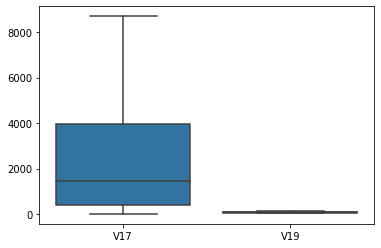

In [29]:
sns.boxplot(data=con_train[['V17','V19']])

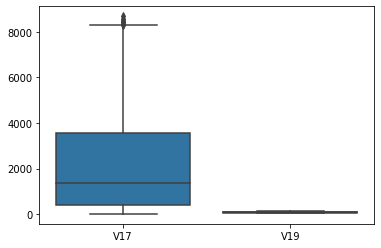

In [30]:
sns.boxplot(data=con_test[['V17','V19']])

In [31]:
#V17,V19에 대해서 standard scaling 변환을 수행하고

#V18,V20은 정수 값으로 연속형변수로도 볼수 있지만 범주형이 label encoding된 상태라고 볼수도 있다

#어느 경우도 상관없다고 생각하지만 V17,V19는 실수로 존재하고 V18,V20은 정수로 존재하기 때문에 

#scaling을 해버릴경우 실수값을 input에 넣기 때문에 모델 성능을 떨어뜨릴 수 있다

#후자의 label encoding된 상태로 취급하고 변환을 수행하지 않는다

scaler = StandardScaler()

train_v17_v19 = pd.DataFrame(scaler.fit_transform(con_train[['V17','V19']]),columns=['V17','V19'])

train_v17_v19.head()

,V17,V19
0,-1.007477,-1.180006
1,-0.198150,-0.274457
2,-0.172081,0.799838
3,-0.764807,-0.508362
4,-0.878243,-1.544230


In [32]:
scaler = StandardScaler()

test_v17_v19 = pd.DataFrame(scaler.fit_transform(con_test[['V17','V19']]),columns=['V17','V19'])

test_v17_v19.head()

,V17,V19
0,0.207393,1.351767
1,0.571572,-0.140936
2,-0.306362,-0.291516
3,1.174653,0.512122
4,-0.943791,-0.489561


In [33]:
#나중에 사용할 test 데이터의 id를 미리 구해놓는다

test_id = test['ID']

In [34]:
#모든 변환된 데이터를 합쳐서 train, test set을 구성함

train = pd.concat([cat_train_dummy,train_v17_v19,con_train[['V18','V20']]],axis=1)

test = pd.concat([cat_test_dummy,test_v17_v19,con_test[['V18','V20']]],axis=1)

In [35]:
#학습용, 검증용으로 8:2로 데이터 분리

x_train,x_val,y_train,y_val = train_test_split(train,train_label,test_size=0.2,random_state=10)

In [36]:
#제한된 라이브러리내에서,

#정형데이터의 분류모델에서 성능이 좋다고 유명한 모델은 random forest, svm이 있다. 그래서 이 2개 모델을 구축해본다.

clf1 = RandomForestClassifier(n_estimators=50, max_depth=5,random_state=10)
clf1.fit(x_train,y_train)

clf2 = svm.SVC(kernel='rbf',gamma = 0.7, max_iter = 10000,random_state=10) 
clf2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.7, max_iter=10000, random_state=10)

###### 문제 2.3. 모델 평가를 위한 성능 지표를 활용하여 "문제 2.2"에서 구축한 모델들의 성능을 비교하고 비교 결과를 해석하세요.


---


In [37]:
#학습한 모델을 이용해서 검증용 데이터 x_val을 prediction

clf1_prediction = clf1.predict(x_val)

clf2_prediction = clf2.predict(x_val)

In [38]:
#roc_auc를 classification의 평가지표로 주로 사용하므로 이를 이용해서 평가를 수행

#random forest에 대한 평가지표

print(roc_auc_score(y_val,clf1_prediction))

0.6529190042075736


In [39]:
#svm의 평가지표

print(roc_auc_score(y_val,clf2_prediction))

#random forest의 roc_auc 점수가 0.65로 svm의 0.55보다 높으므로 성능이 더 좋다고 말할 수 있다

0.5551367461430575


###### 문제 2.4. "문제 2.3"에서 비교한 모델 중 우수한 모델의 변수 중요도(feature importance)를 제시하고 그 결과를 해석하세요.

---

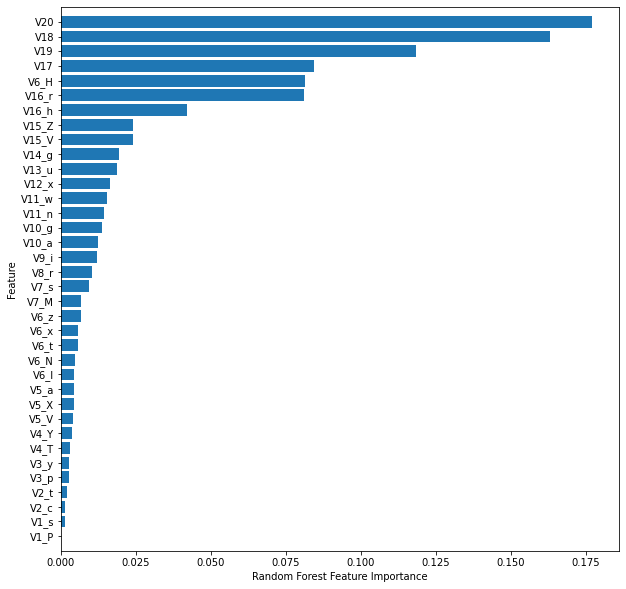

In [52]:
#sklearn의 모델을 받아 feature importance를 그려주는 함수
def plot_feature_importance(model):
    n_features = x_val.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), x_val.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(clf1)

#그림을 보면 V20,V18,V19,V17,...순으로 모델의 종속변수 Label을 구별하는데 중요한 영향력을 가진다는 것을 확인할 수 있다

###### 문제 2.5. 평가용 데이터 셋의 Label 예측값과 Label 값에 따른 예측 확률 값을 아래 나열된 파일 형식에 맞춰 제출해 주세요. 


---


In [ ]:
#predict_proba는 model의 예측 확률을 구해줌

Prob_P = []

Prob_B = []

Pred = []

#a에서 a[0]은 0일 확률, a[1]은 1일 확률

for a in clf1.predict_proba(test):
  Prob_P.append(a[1])
  Prob_B.append(a[0])

#a[1]+a[0] = 1이고 기준 확률을 0.5로 하여 a[1]이 0.5이상이면 label을 1로 예측
#a[1]이 0.5 미만이면 a[0]이 0.5이상이고, label을 0으로 예측

  if a[1] >= 0.5:
    Pred.append(1)
  
  else:
    Pred.append(0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
#형식에 맞게 데이터프레임을 생성하고 csv파일로 변환

output = pd.DataFrame({'ID':test_id,'Prob_P':Prob_P,'Prob_B':Prob_B,'Pred':Pred})

output.to_csv('output_A2.csv')